In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import circulant
# load the numpy txt from a file 
data = np.loadtxt('data/curves/dino_noisy.txt')
#data = np.vstack([data, [data[0,0], data[0,1]]])
from IPython.display import display, clear_output

len(f"Dino length: {len(data)}")

16

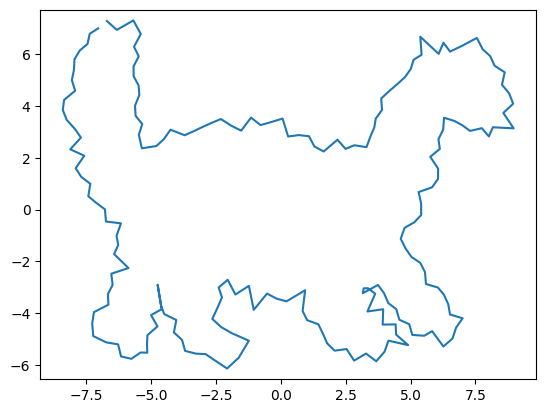

In [11]:
# plot the data 

plt.plot(data[:,0], data[:,1], '-')
plt.axis('equal')
plt.show()


In [93]:
def calculate_distance_(data1):
    # take the norm between x and y coordinates
    distances = np.linalg.norm(data1[1:] - data1[:-1], axis=1)
    # sum the distances
    distance = np.sum(distances)
    return distance



In [95]:
def smoothing_equation_1_10_2(data, LAMBDA=0.19, iterations=10, true_data=None):
    # Make a copy of the original data to avoid modifying it
    X_new = data.copy()
    
    # Ensure the curve is closed by making first and last points identical
    if not np.array_equal(X_new[0], X_new[-1]):
        X_new = np.vstack([X_new, X_new[0]])
    
    N = X_new.shape[0]
    # Construct the circulant matrix for cyclic boundary conditions
    L = np.zeros(N)
    L[0] = -2
    L[1] = 1
    L[-1] = 1
    L = circulant(L)

    I = np.eye(N)
    
    # Always apply the matrix multiplication once
    X_new = (I + LAMBDA * L) @ X_new
    

    # If iterations > 0, apply additional smoothing
    if iterations > 0:
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.grid(True)
        ax.set_aspect('equal')
        for _ in range(iterations-1):  # -1 because we already did one iteration
            ax.clear()
            X_new = (I + LAMBDA * L) @ X_new
            # Plot the curve
            ax.plot(X_new[:,0], X_new[:,1], '-', color='m')
            # Add the closing line
            ax.plot([X_new[-1,0], X_new[0,0]], [X_new[-1,1], X_new[0,1]], '-', color='m')
            ax.set_title(rf"Smoothing with iterations={iterations}, $\lambda=${LAMBDA} (iteration)")
            ax.grid(True)
            ax.set_aspect('equal')
            clear_output(wait=True)
            display(fig)
            plt.pause(0.1)  # Add small pause to make animation visible

    plt.figure(figsize=(10, 8))
    # Plot the smoothed data
    plt.plot(X_new[:,0], X_new[:,1], '-', color='m')
    # Add a single line connecting end to start
    plt.plot([X_new[-1,0], X_new[0,0]], [X_new[-1,1], X_new[0,1]], '-', color='m')
    plt.title(rf"Smoothing with $\lambda=${LAMBDA}, iterations={iterations} (final result)")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

    if true_data is not None:
        plt.figure(figsize=(10, 8))
        plt.plot(true_data[:,0], true_data[:,1], '-', label='True Data')
        plt.plot(X_new[:,0], X_new[:,1], '-', label='Smoothed')
        # Add a single line connecting end to start for smoothed data
        plt.plot([X_new[-1,0], X_new[0,0]], [X_new[-1,1], X_new[0,1]], '-')
        plt.title(rf"Smoothing with $\lambda=${LAMBDA}, iterations={iterations} ")
        plt.axis('equal')
        plt.grid(True)
        plt.legend()
        plt.show()

    distance = calculate_distance_(X_new)
    print(f"The total distance of the curve is {distance:.4f}")
    print(f"Length of the dataset is {N}")
    return X_new

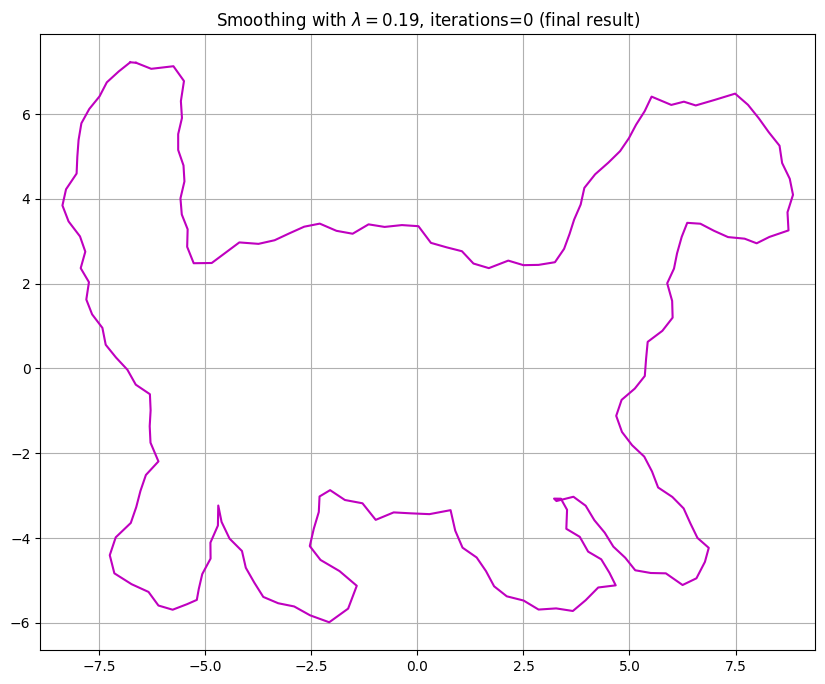

The total distance of the curve is 79.9275
Length of the dataset is 201


In [97]:
orange = smoothing_equation_1_10_2(data=data, LAMBDA=0.19, iterations=0)

In [ ]:
data = create_entry()